In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Load the CSV into a DataFrame
df = pd.read_csv("alz.csv", usecols=['RowId', 'LocationDesc', 'Class', 'Data_Value_Type', 'Topic', 'Data_Value', 'Stratification1', 'Stratification2','YearEnd'])
df.rename(columns={'Stratification1': 'Age Categories'}, inplace=True)
print("\nColumns now:")
print(df.columns)


Columns now:
Index(['RowId', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Data_Value_Type',
       'Data_Value', 'Age Categories', 'Stratification2'],
      dtype='object')


In [2]:
# Length of the dataset
dataset_length = len(df)
print("\nLength of the Dataset:", dataset_length)


Length of the Dataset: 250937


In [3]:
# Create 'Sex' column based on 'Stratification2'
def get_sex(x):
    if 'Male' in str(x):
        return 'Male'
    elif 'Female' in str(x):
        return 'Female'
    else:
        return None

df['Sex'] = df['Stratification2'].apply(get_sex)

# Create 'Race' column based on 'Stratification2'
def get_race(x):
    if 'Male' not in str(x) and 'Female' not in str(x):
        return x
    else:
        return None

df['Race'] = df['Stratification2'].apply(get_race)
df.drop(columns=['Stratification2'], inplace=True)
print(df.head())

                                       RowId  YearEnd LocationDesc  \
0  BRFSS~2019~2019~9002~Q27~TMC03~AGE~GENDER     2019      Midwest   
1  BRFSS~2021~2021~9002~Q08~TOC01~AGE~GENDER     2021      Midwest   
2    BRFSS~2015~2015~9004~Q43~TOC11~AGE~RACE     2015         West   
3      BRFSS~2017~2017~21~Q27~TMC03~AGE~RACE     2017     Kentucky   
4    BRFSS~2021~2021~9003~Q43~TOC11~AGE~RACE     2021        South   

            Class                                            Topic  \
0   Mental Health                 Lifetime diagnosis of depression   
1  Overall Health  Physically unhealthy days (mean number of days)   
2  Overall Health                     Arthritis among older adults   
3   Mental Health                 Lifetime diagnosis of depression   
4  Overall Health                     Arthritis among older adults   

  Data_Value_Type  Data_Value     Age Categories   Sex                    Race  
0      Percentage        10.6  65 years or older  Male                    Non

In [4]:
# Filter rows where 'Class' contains 'Cognitive Decline'
df = df[df['Class'].str.contains('Cognitive Decline')]
df = df[df['Data_Value_Type'] == 'Percentage']

# Reset index
df.reset_index(drop=True, inplace=True)

# Check the updated DataFrame
print(df.head())

                                        RowId  YearEnd          LocationDesc  \
0     BRFSS~2016~2021~23~Q30~TCC01~AGE~GENDER     2021                 Maine   
1    BRFSS~2015~2015~11~Q30~TCC01~AGE~OVERALL     2015  District of Columbia   
2     BRFSS~2016~2021~9003~Q41~TCC03~AGE~RACE     2021                 South   
3     BRFSS~2018~2018~9002~Q41~TCC03~AGE~RACE     2018               Midwest   
4  BRFSS~2016~2021~9004~Q30~TCC01~AGE~OVERALL     2021                  West   

               Class                                              Topic  \
0  Cognitive Decline  Subjective cognitive decline or memory loss am...   
1  Cognitive Decline  Subjective cognitive decline or memory loss am...   
2  Cognitive Decline  Need assistance with day-to-day activities bec...   
3  Cognitive Decline  Need assistance with day-to-day activities bec...   
4  Cognitive Decline  Subjective cognitive decline or memory loss am...   

  Data_Value_Type  Data_Value Age Categories   Sex                 R

In [5]:
dataset_length = len(df)
print("\nLength of the Dataset:", dataset_length)


Length of the Dataset: 21015


In [6]:
unique_locations = df['LocationDesc'].unique()

# Display the unique values
print("Unique Locations:")
print(unique_locations)

Unique Locations:
['Maine' 'District of Columbia' 'South' 'Midwest' 'West' 'Washington'
 'Wyoming' 'Connecticut' 'Nebraska' 'Kentucky' 'Puerto Rico' 'Missouri'
 'South Dakota' 'Maryland' 'North Carolina' 'Georgia' 'Louisiana'
 'Florida' 'Arizona' 'Mississippi' 'Hawaii' 'Illinois' 'California'
 'United States, DC & Territories' 'New York' 'Minnesota' 'Michigan'
 'Idaho' 'Alaska' 'Vermont' 'New Jersey' 'Iowa' 'Tennessee' 'Colorado'
 'Indiana' 'Utah' 'Northeast' 'Arkansas' 'Delaware' 'Oregon' 'Wisconsin'
 'Montana' 'Ohio' 'Virginia' 'Kansas' 'Nevada' 'Oklahoma' 'Alabama'
 'Pennsylvania' 'Massachusetts' 'Rhode Island' 'New Mexico' 'Texas'
 'West Virginia' 'North Dakota' 'New Hampshire' 'South Carolina']


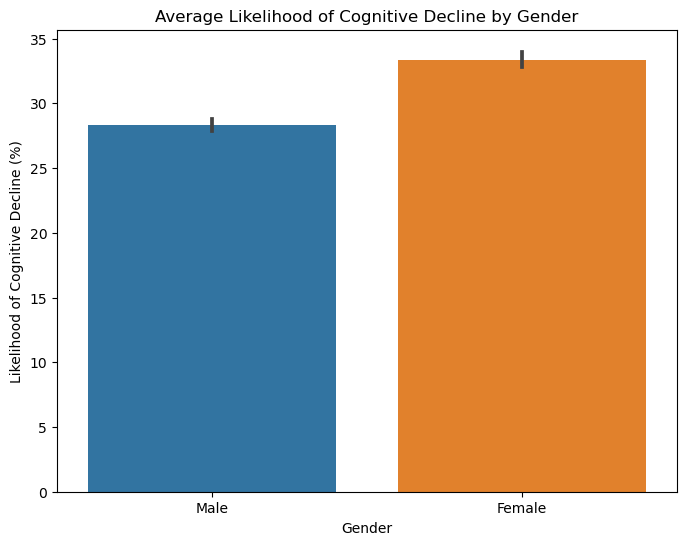

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Data_Value', estimator=np.mean)
plt.title('Average Likelihood of Cognitive Decline by Gender')
plt.xlabel('Gender')
plt.ylabel('Likelihood of Cognitive Decline (%)')
plt.show()


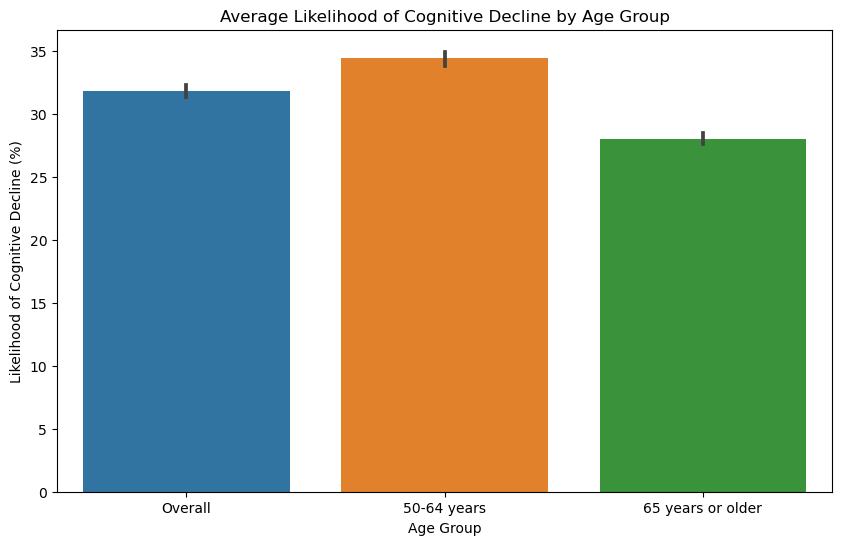

In [8]:
# Barplot for Age
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Categories', y='Data_Value')
plt.title('Average Likelihood of Cognitive Decline by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Likelihood of Cognitive Decline (%)')
plt.show()


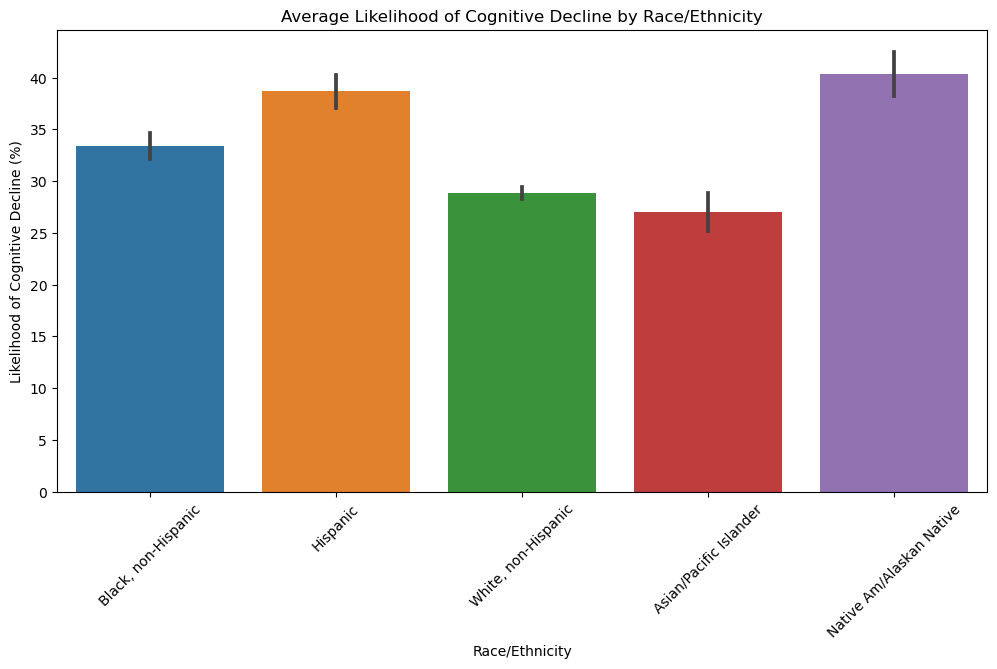

In [9]:
# Barplot for Race
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Race', y='Data_Value')
plt.title('Average Likelihood of Cognitive Decline by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Likelihood of Cognitive Decline (%)')
plt.xticks(rotation=45)
plt.show()


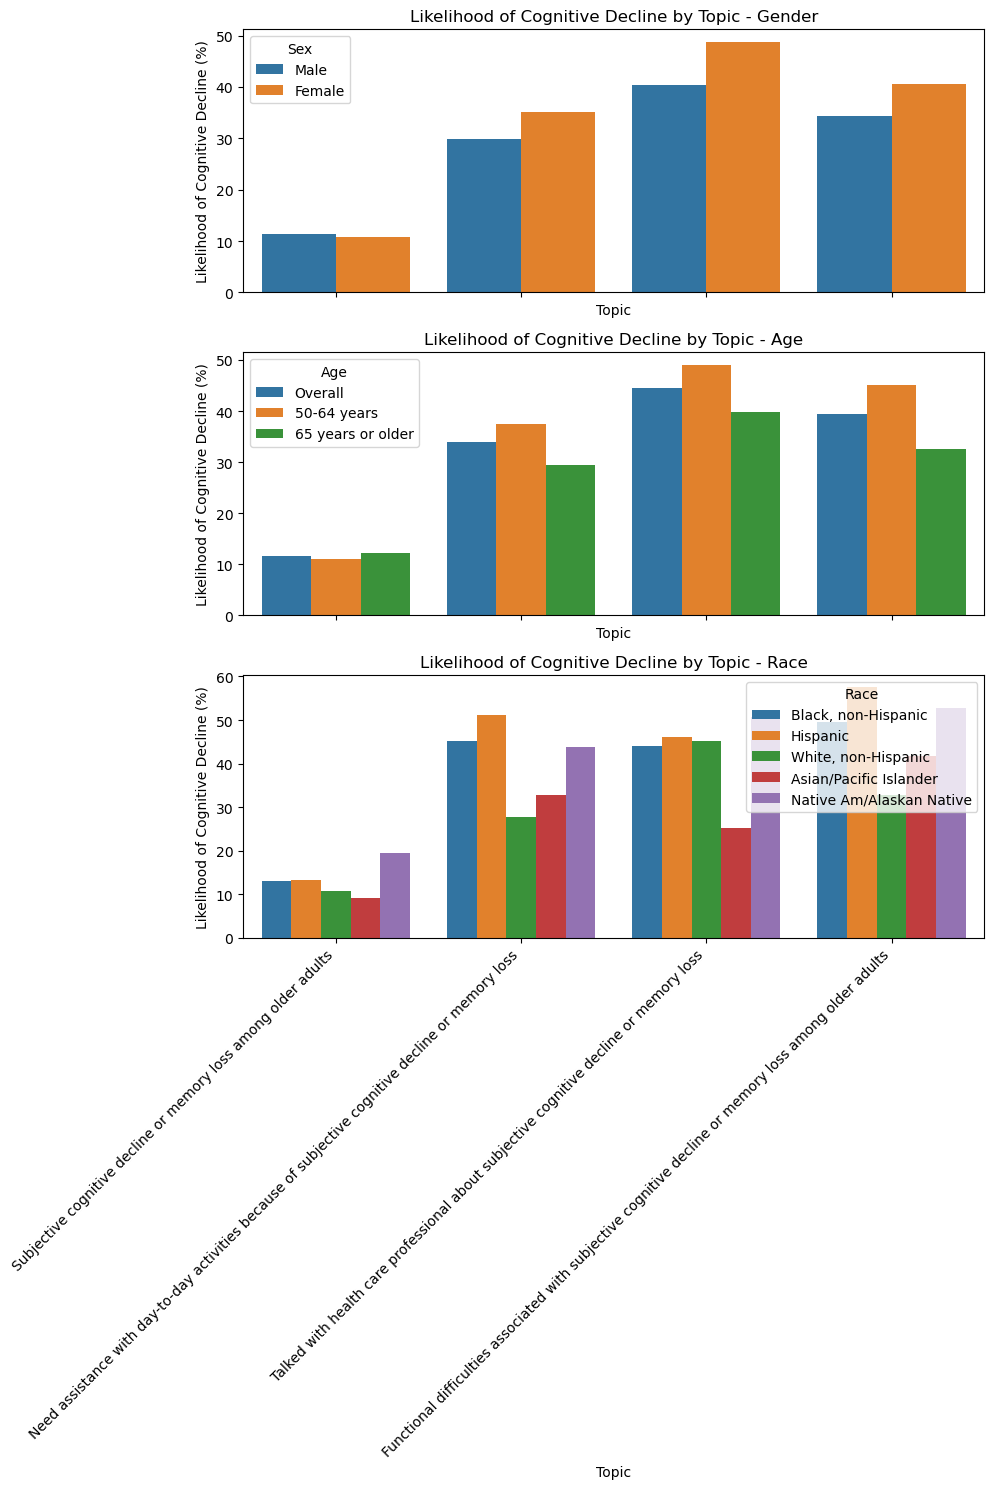

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot for Gender
sns.barplot(ax=axes[0], data=df, x='Topic', y='Data_Value', hue='Sex', ci=None)
axes[0].set_title('Likelihood of Cognitive Decline by Topic - Gender')
axes[0].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[0].legend(title='Sex')

# Plot for Age
sns.barplot(ax=axes[1], data=df, x='Topic', y='Data_Value', hue='Age Categories', ci=None)
axes[1].set_title('Likelihood of Cognitive Decline by Topic - Age')
axes[1].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[1].legend(title='Age')

# Plot for Race
sns.barplot(ax=axes[2], data=df, x='Topic', y='Data_Value', hue='Race', ci=None)
axes[2].set_title('Likelihood of Cognitive Decline by Topic - Race')
axes[2].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[2].legend(title='Race', loc='upper right')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


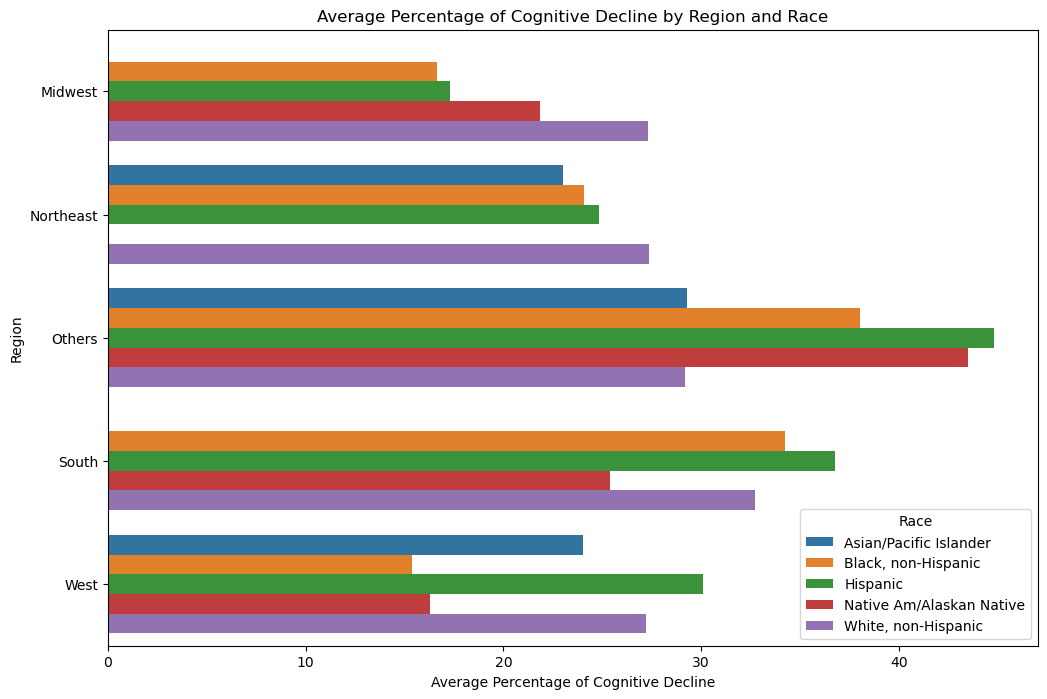

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the grouped regions and locations
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Create a reverse mapping of states to regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Load your DataFrame (replace 'df' with your DataFrame name)
# df = pd.read_csv("your_data.csv")

# Map each location to its corresponding region
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each race within each region
average_race_data = df.groupby(['Region', 'Race'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each race within each region
plt.figure(figsize=(12, 8))
sns.barplot(data=average_race_data, x='Data_Value', y='Region', hue='Race', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Race')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Race')
plt.show()

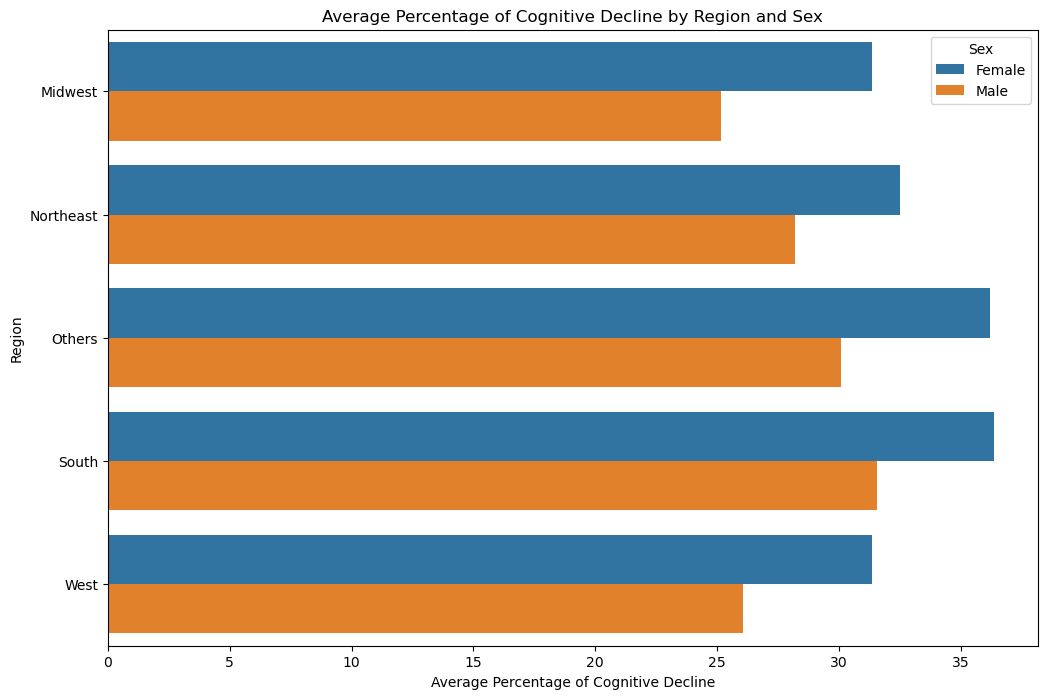

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the grouped regions and locations
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Create a reverse mapping of states to regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Load your DataFrame (replace 'df' with your DataFrame name)
# df = pd.read_csv("your_data.csv")

# Map each location to its corresponding region
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each sex within each region
average_sex_data = df.groupby(['Region', 'Sex'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each sex within each region
plt.figure(figsize=(12, 8))
sns.barplot(data=average_sex_data, x='Data_Value', y='Region', hue='Sex', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Sex')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Sex')
plt.show()


In [13]:
# Check the data types of each variable
print(df.dtypes)

RowId               object
YearEnd              int64
LocationDesc        object
Class               object
Topic               object
Data_Value_Type     object
Data_Value         float64
Age Categories      object
Sex                 object
Race                object
Region              object
dtype: object


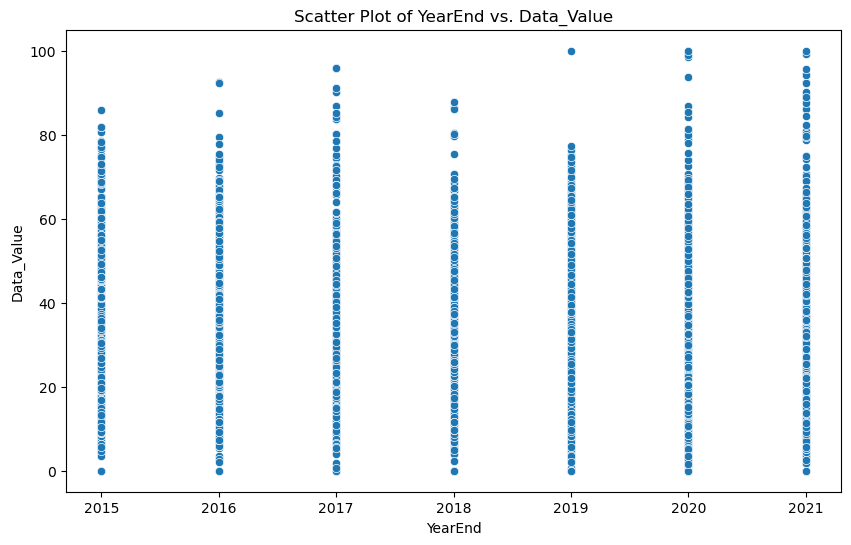

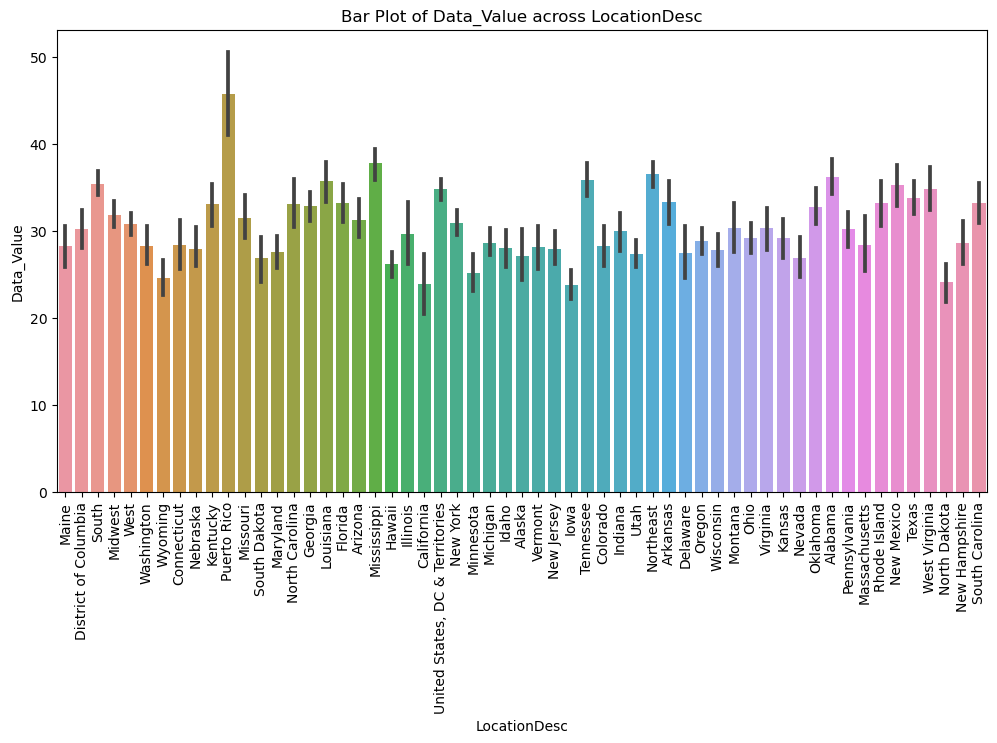

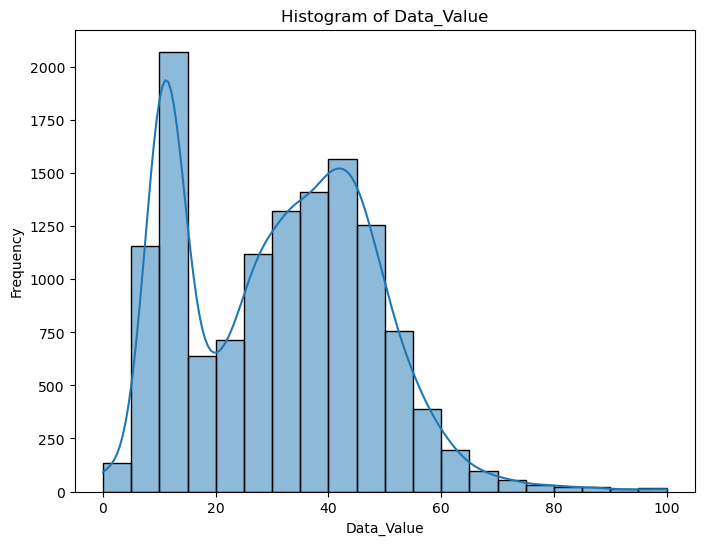

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: YearEnd vs. Data_Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearEnd', y='Data_Value')
plt.title('Scatter Plot of YearEnd vs. Data_Value')
plt.xlabel('YearEnd')
plt.ylabel('Data_Value')
plt.show()

# Bar Plot: Distribution of Data_Value across LocationDesc
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='LocationDesc', y='Data_Value')
plt.title('Bar Plot of Data_Value across LocationDesc')
plt.xlabel('LocationDesc')
plt.ylabel('Data_Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Histogram: Distribution of Data_Value
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Data_Value', bins=20, kde=True)
plt.title('Histogram of Data_Value')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.show()